# Contents
[Imports and data frame creation](#Imports-and-data-frame-creation)<br>
[Scaling](#Scaling)<br>
[Pipelines](#Pipelines)<br>
[Cross Validation](#Cross-Validation)<br>
<br>
<br>

# Imports and data frame creation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), 
                                    df['target'], test_size=0.3, random_state=42)

In [4]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [5]:
y_train.head()

5      28.7
116    21.2
45     19.3
16     23.1
468    19.1
Name: target, dtype: float64

# Scaling

## StandardScaler

Subtracts the mean and divides with the standard deviation

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_train_scaled[0]

array([-0.41425879, -0.50512499, -1.29214218, -0.28154625, -0.85108479,
        0.14526384, -0.365584  ,  1.08162833, -0.74617905, -1.11279004,
        0.18727079,  0.39651419, -1.01531611])

In [8]:
# mean is about zero
X_train_scaled.mean()

-1.196589787514293e-16

In [9]:
# standard deviation is about 1 
X_train_scaled.std()

1.0

## MinMaxScaler

Transforms the data so it is in range [0, 1]<br>
Later transformations can go below or above range

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
minmax_scaler = MinMaxScaler()
X_train_scaled = minmax_scaler.fit_transform(X_train)
X_train_scaled[0]

array([2.33681784e-04, 0.00000000e+00, 3.65623822e-02, 0.00000000e+00,
       1.50205761e-01, 5.22066301e-01, 5.74665294e-01, 4.48544590e-01,
       8.69565217e-02, 6.67938931e-02, 6.48936170e-01, 9.92990065e-01,
       9.60264901e-02])

In [12]:
# mean
X_train_scaled.mean()

0.3824738923510144

In [13]:
# standard deviation
X_train_scaled.std()

0.342151368772363

## MaxAbsScaler

Transforms the data so it is in range [-1, 1]<br>
The data is supposed to have a mean of 0 before scaling<br>
Later transformations can go below or above range

In [14]:
from sklearn.preprocessing import MaxAbsScaler

In [15]:
maxabs_scaler = MaxAbsScaler()
X_train_scaled = maxabs_scaler.fit_transform(X_train - X_train.mean())
X_train_scaled[0]

array([-0.04023138, -0.1364174 , -0.53911473, -0.07926829, -0.31637377,
        0.04236361, -0.15325889,  0.27465958, -0.44209505, -0.60877687,
        0.07432836,  0.09577055, -0.28224849])

In [16]:
# mean is about zero if the input data also had a mean of zero before 
X_train_scaled.mean()

5.345089381485217e-16

In [17]:
# standard deviation
X_train_scaled.std()

0.3661270057355531

## One Hot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
label_values = np.array(list('AABCPPPOUU'))
label_values

array(['A', 'A', 'B', 'C', 'P', 'P', 'P', 'O', 'U', 'U'], dtype='<U1')

In [20]:
encoder = OneHotEncoder(sparse=False)
values = encoder.fit_transform(label_values.reshape(-1,1))
values

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [21]:
import seaborn as sns

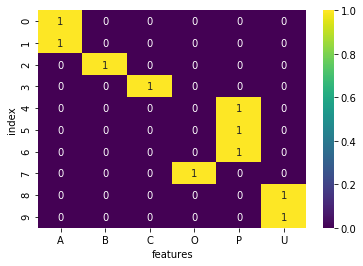

In [22]:
sns.heatmap(pd.DataFrame(values, columns=encoder.categories_), annot=True, cmap='viridis')
plt.xlabel('features')
plt.ylabel('index')
plt.show()

In [23]:
encoder.inverse_transform([values[0]])

array([['A']], dtype='<U1')

In [24]:
encoder.inverse_transform([values[2]])

array([['B']], dtype='<U1')

## Label Encoder for categorical features

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_values = list('AABCPPPOUU')
label_values

['A', 'A', 'B', 'C', 'P', 'P', 'P', 'O', 'U', 'U']

In [27]:
encoder = LabelEncoder()
values = encoder.fit_transform(label_values)
values

array([0, 0, 1, 2, 4, 4, 4, 3, 5, 5])

In [28]:
encoder.transform(['C','P','O'])

array([2, 4, 3])

In [29]:
encoder.inverse_transform([2, 4, 3])

array(['C', 'P', 'O'], dtype='<U1')

# Pipelines

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [31]:
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [32]:
linear_pipeline.fit(X_train, y_train)
y_train_pred = linear_pipeline.predict(X_train)
y_test_pred = linear_pipeline.predict(X_test)
print('Train: ', mean_squared_error(y_train, y_train_pred))
print('Test:  ', mean_squared_error(y_test, y_test_pred))

Train:  22.545481487421423
Test:   21.517444231177212


In [33]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

In [34]:
poly_pipeline.fit(X_train, y_train)

y_train_pred = poly_pipeline.predict(X_train)
y_test_pred = poly_pipeline.predict(X_test)
print('Train: ', mean_squared_error(y_train, y_train_pred))
print('Test:  ', mean_squared_error(y_test, y_test_pred))

Train:  8.411894849055036
Test:   29.80688779502944


# Cross Validation (K-Fold CV)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
scores = cross_val_score(linear_pipeline, df.drop('target', axis=1), df['target'], cv=5)
scores

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [37]:
print('accuracy: ', scores.mean())

accuracy:  0.35327592439588273


In [38]:
scores = cross_val_score(poly_pipeline, df.drop('target', axis=1), df['target'], cv=5)
scores

array([  0.20873774,  -1.58536453,   0.21594013,  -0.34853029,
       -34.19569546])

In [39]:
print('accuracy: ', scores.mean())

accuracy:  -7.140982483631336
